Hubbert (1956) was the first to employ the concept of LGM (Logistic Growth Model) in the oil industry. Hubbert used the LGM approach to predict the cumulative production from gas and oil fields or regions. Clark et al. (2011) proposed a three-parameter growth model to forecast the production growth from a production well; that is, cumulative oil “NP” or gas “GP.” Clark and co-authors proposed the following expression:

For cumulative oil $"Np"$ or gas $"Gp"$
$$Gp = \frac{(K)t^n}{a+t^n}$$
For oil rate $"Qo"$ or gas rate $"Qg"$
$$Q_g = \frac{(K)nat^{n-1}}{(a+t^n)^2}$$
The parameters $"a"$ and $"n"$ are regression variables that impact the shape and upwards and downward of the decline curve. The "K" acts as a bounded or maximum growth.


Data and example 18.7 (Ahmed, )

Matching observed production data using LGM method

Load data from .csv file


HTML widgets cannot be represented in plain text (need html)

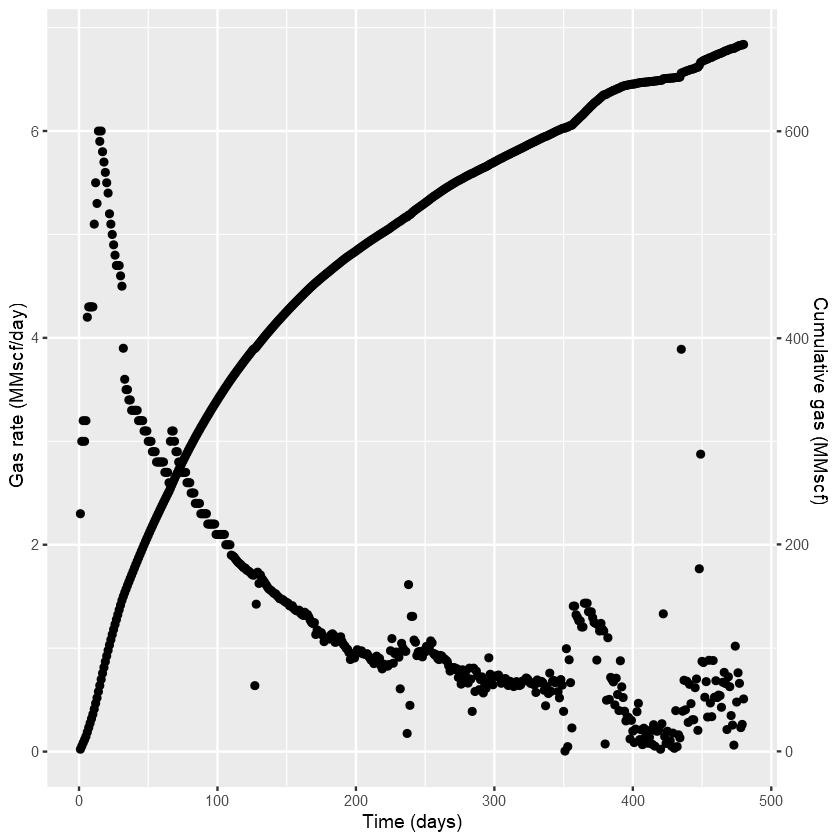

In [5]:
options(warn = -1) 
library(ggplot2)
library(plotly)
library(dplyr)
library(ggpubr)
library(crosstalk)
library(minpack.lm)
library(DT)

gas_rate <- read.csv("REH_Ch_18.csv")

datatable(gas_rate)

fig <- ggplot() + 
       geom_point(data = gas_rate, aes(DAYS,RATE), color = "black") +
       geom_point(data = gas_rate, aes(DAYS,GP/100), color = "black") +
       ylab("Gas rate (MMscf/day)") + xlab("Time (days)") +
       scale_y_continuous(sec.axis = sec_axis(~ . * 100, name="Cumulative gas (MMscf)"))  
                          


fig


Assuming the following values for the three LMG parameters:

$$K = 800$$
$$N = 1.2$$
$$a = 220$$


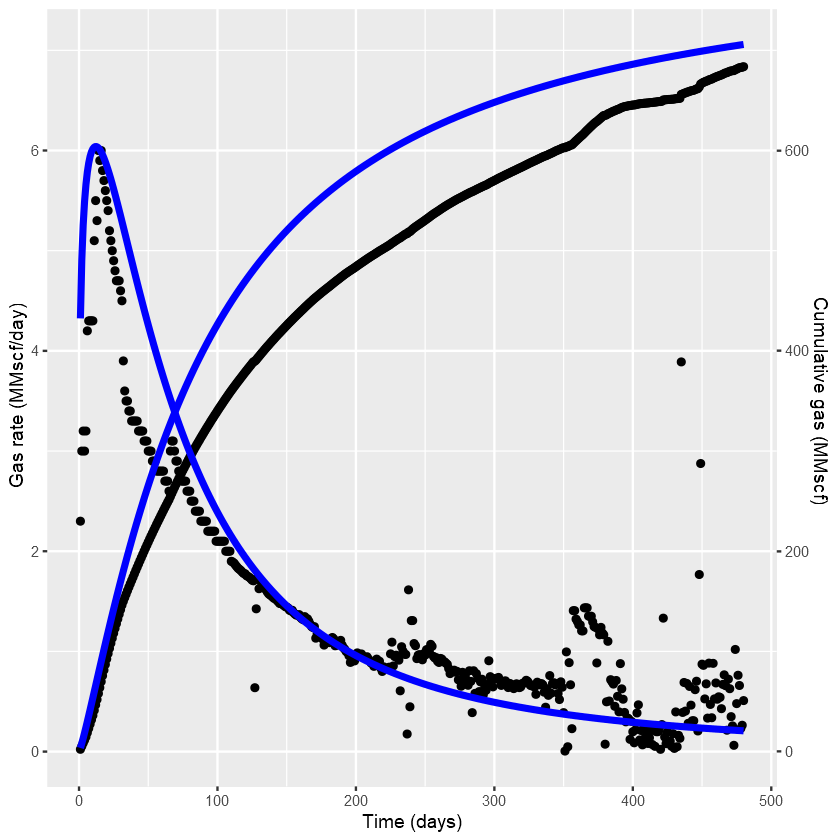

In [6]:
gas_rate <- gas_rate %>%
            mutate(Qg_cal = (800 * 1.2 * 220 * DAYS^(1.2-1))/(220 + DAYS^1.2)^2,
            Gp_cal = (800 * DAYS^(1.2))/(220 + DAYS^1.2))


fig <- fig + geom_line(data = gas_rate, aes(gas_rate$DAYS,gas_rate$Qg_cal), color = "blue", size = 1.5) +
             geom_line(data = gas_rate, aes(gas_rate$DAYS,gas_rate$Gp_cal/100), color = "blue", size = 1.5)

fig


We can use non-linear regression with minpack.lm package using



K.cal      a.cal      n.cal 
808.044750 239.005696   1.124712

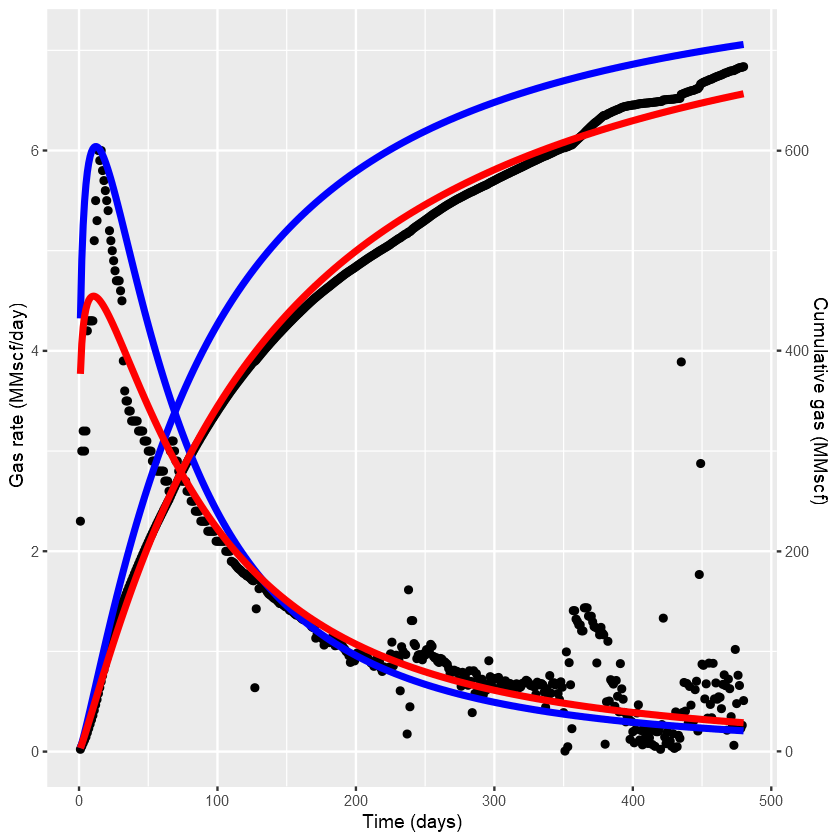

In [3]:
dca.LGM <- nlsLM(
  RATE ~ (K.cal*n.cal*a.cal*DAYS^(n.cal-1))/(a.cal+DAYS^n.cal)^2,
  data = gas_rate,
  start = list(
    K.cal = 800,
    a.cal = 220,
    n.cal = 1.2
    
  )
)

coefficients(dca.LGM)


gas_rate$Qg_reg <- fitted(dca.LGM) 
gas_rate$Gp_reg <- (coefficients(dca.LGM)[1]*gas_rate$DAYS^(coefficients(dca.LGM)[3]))/
                   (coefficients(dca.LGM)[2]+gas_rate$DAYS^coefficients(dca.LGM)[3])

fig <- fig + geom_line(data = gas_rate, aes(DAYS,Qg_reg), color = "red", size = 1.5) +
             geom_line(data = gas_rate, aes(DAYS,Gp_reg/100), color = "red", size = 1.5)

fig


In [4]:
datatable(gas_rate)



HTML widgets cannot be represented in plain text (need html)

Reference
Ahmed, T (2019) Reservoir Engineering Handbook. Fifth edition.
